In [86]:
# Importing the libraries

import nltk
from nltk.corpus import stopwords
import re

import pandas as pd
import string
import seaborn as sns

In [45]:
# Importing the file
message = pd.read_csv('D:\\Hashir\\IVY\\Python\\Project\\Spam Message detection\\spam.csv',
                      encoding='latin-1')

In [46]:
message.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [47]:
# Dropping the garbage columns and renaming v1 and v2 as 'label' and 'message' respectively
message = message.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
message = message.rename(columns = {'v1':'label','v2':'message'})

In [48]:
message.info()
message.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [49]:
message.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [50]:
message["Length"] = message["message"].apply(len)

In [51]:
message.head()

,label,message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000254715AA4C8>,
      dtype=object)

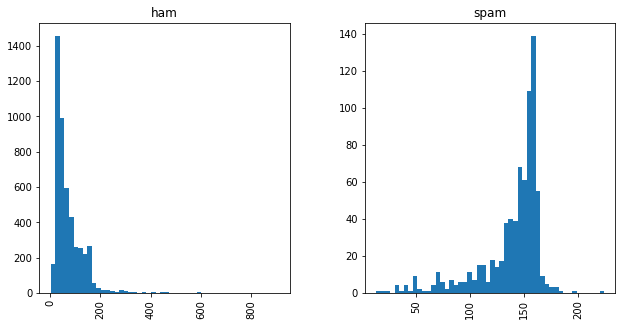

In [20]:
message.hist(column='length', by= 'label', bins=50, figsize=(10,5))

In [54]:
# Max length of message that is sent 
message['Length'].max()
message[message['Length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [58]:
# Min length of the message that is sent
message['Length'].min()
message[message['Length']==message['Length'].min()]['message'].iloc[0]

'Ok'

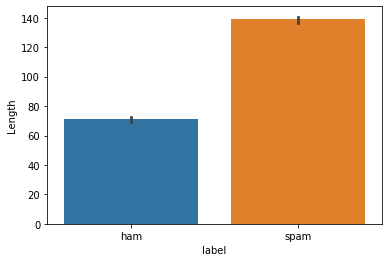

In [59]:
sns.barplot(x='label', y='Length', data=message)

### Text processing 

In [60]:
# Duplicate of our data
message_copy = message['message'].copy()

In [65]:
# Removing the punctuations and stop words
class PreProcessText(object):
    def init_(self):
        pass

    def remove_punctuation(self, text):
        msg = []
        for x in text:
            if x in string.punctuation:
                pass
            else:
                msg.append(x)
        msg = ''.join(msg)
        
        return msg
    
    def remove_stopwords(self, text):
        words=[]
        for x in text.split():
            if x.lower() in stopwords.words('english'):
                pass
            else:
                words.append(x)
        
        return words
    
    def token_words(self, text=''):
        msg = self.remove_punctuation(text)
        words = self.remove_stopwords(msg)
        return words

In [66]:
# Sample:
sample_msg = 'Sample message! notice: it has punctuation.'
obj = PreProcessText()
words = obj.token_words(sample_msg)
print(words)

['Sample', 'message', 'notice', 'punctuation']


In [67]:
message["message"].head(5).apply(obj.token_words)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

### Vectorization

In [68]:
bow_transformer = CountVectorizer(analyzer = obj.token_words).fit(message["message"])

In [69]:
messages_bow = bow_transformer.transform(message['message'])

In [70]:
print("Shape of sparse matrix{}".format(messages_bow.shape))

Shape of sparse matrix(5572, 11304)


In [71]:
# To check Sparsity:
sparsity = (100 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print("Sparsity: {}".format(sparsity))

Sparsity: 0.07968927896991783


In [88]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(message)):
    review = re.sub('[^a-zA-Z]', ' ', message['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    
    
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

y=pd.get_dummies(message['label'])
y=y.iloc[:,1].values


# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)

In [89]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [90]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [92]:
# To find the accuracy

from sklearn.metrics import confusion_matrix,accuracy_score

accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9865470852017937